# PDA Project Dec 2018 
by Colm Doherty

## Introduction
This notebook is submitted according to the brief 'Project 2018 for Programming for Data Analysis'. The task is to create a data set by simulating a real-world phenomenon of
your choosing. Then, rather than collect data related to the phenomenon, you should model and synthesise such data using Python.

# 1. Researching an existing real-world dataset

As a recreational sailor I'm very interested in weather data. I searched for & found a good dataset source on Data.gov.ie, compiled by Met Eireann and detailing monthly rainfall at the Dun Laoghaire weather station, 1997-2018. It consists of approx 250 data points for each of 4 different variables, and it's available at: https://cli.fusio.net/cli/climate_data/webdata/mly9223.csv
        

## Import Libraries

In [1]:
# Import pandas etc.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from scipy.stats import poisson
from scipy.stats import skewnorm
import statistics

## Import Dataset

In [2]:
# Load the dataset
import csv as df
df = pd.read_csv("MET9223.csv", skiprows=13) 

## Investigate the variable types and their distributions

The four variables measured are: 

"rain":  -  Precipitation Amount (mm), a floating point value to 1 decimal place

"gdf":   -  Greatest daily fall (mm), a floating point value to 1 decimal place

"rd":    -  Number of rain days (0.2mm or more), a positive Integer

"wd":    -  Number of wet days (1.0 mm or more), a positive Integer


In [97]:
# examine the dataset
df

,year,month,rain,gdf,rd,wd
0,1997,8,91.8,17.4,18.0,16.0
1,1997,9,11.5,2.9,12.0,4.0
2,1997,10,70.7,20.7,14.0,10.0
3,1997,11,187.4,54.6,22.0,17.0
4,1997,12,84.4,21.7,14.0,12.0
5,1998,1,109.4,16.5,19.0,15.0
6,1998,2,8.4,2.9,8.0,4.0
7,1998,3,61.3,10.3,15.0,11.0
8,1998,4,136.5,39.0,26.0,16.0
9,1998,5,27.7,12.5,11.0,5.0


In [4]:
df.dtypes

year       int64
month      int64
rain     float64
gdf       object
rd        object
wd        object
dtype: object

So 'rain' is a floating point value, while 'gdf','rd' and 'wd' are currently dtype objects. These column values must be numeric. 

In [56]:
# change object rows to Numeric
df = df.convert_objects(convert_numeric=True)
df.dtypes

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


year       int64
month      int64
rain     float64
gdf      float64
rd       float64
wd       float64
dtype: object

### Descriptive Statistics of the dataset

In [6]:
# Now lets ignore the Year & Month columns (0 & 1):
df1 = df.iloc[:,2:6]
# what does the data distribution look like?
df1.describe()

,rain,gdf,rd,wd
count,253.000000,244.000000,247.000000,247.000000
mean,66.385375,18.068443,15.777328,10.846154
std,40.455267,11.742786,4.752728,4.291300
min,1.200000,1.000000,2.000000,1.000000
25%,36.600000,9.500000,13.000000,8.000000
50%,57.500000,14.650000,16.000000,11.000000
75%,88.300000,24.350000,19.000000,14.000000
max,207.000000,75.600000,30.000000,22.000000


All columns are missing some values. "NaN"s (not a number) will need to be dealt with.

In [80]:
# remove all NaN values (ref: https://stackoverflow.com/questions/13413590/how-to-drop-rows-of-pandas-dataframe-whose-value-in-certain-columns-is-nan)
df1 = df1[pd.notnull(df1)]

## Plot the distributions of the variables in the dataset

In [68]:
# lets select & plot the rain variable
dfr = df1.iloc[:,0]

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


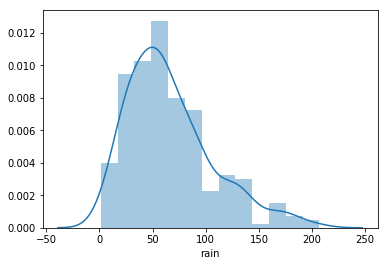

In [76]:
# plot the distribution of 'rain'
sns.distplot(dfr);

Monthly rainfall values (mm) are distributed to a 'pseudo Normal' distribution with a long tail of higher values - ie. positive skew.

In [72]:
# lets look at greatest daily fall - select 'gdf':
dfg = df1.iloc[:,1]

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


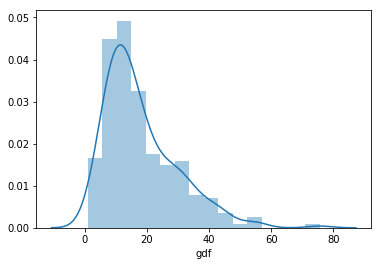

In [77]:
#plot the distribution of 'gdf'
sns.distplot(dfg);

As with the 'rain' variable, values for 'Greatest Daily Fall (gdf) are distributed with a long tail of higher values - ie. positive skew.

In [78]:
# lets select & plot the 'rd' variable
dfrd = df1.iloc[:,2]

But the 'rd' column includes some NaN values (Not a Number), so we must purge these first.

In [84]:
# remove all NaN values (ref: https://stackoverflow.com/questions/13413590/how-to-drop-rows-of-pandas-dataframe-whose-value-in-certain-columns-is-nan)
dfrd = dfrd[pd.notnull(df['rd'])]

In [82]:
df.dtypes

year       int64
month      int64
rain     float64
gdf      float64
rd       float64
wd       float64
dtype: object

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


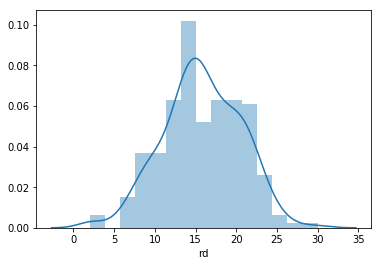

In [85]:
#plot the distribution of 'rd'
sns.distplot(dfrd);

So the values for 'Number of rain days (0.2mm or more)' are also distributed to a fairly Normal distribution with an extra bump at around +1 SD (values of 20.5)

In [86]:
# select wet days (wd). Filter out any NaNs. 
dfw = df.iloc[:,5]

In [87]:
#describe the 'wet days' data distribution
dfw.describe()

count    247.000000
mean      10.846154
std        4.291300
min        1.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       22.000000
Name: wd, dtype: float64

In [88]:
# remove all NaN values (ref: https://stackoverflow.com/questions/13413590/how-to-drop-rows-of-pandas-dataframe-whose-value-in-certain-columns-is-nan)
dfw = dfw[pd.notnull(df['wd'])]

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


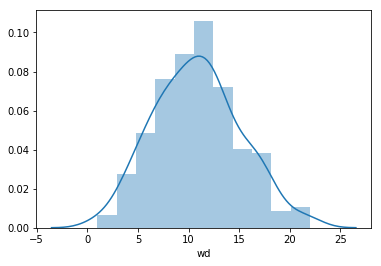

In [89]:
#plot the distribution of 'wd'
sns.distplot(dfw);

Numbers of monthly wet days(>=1mm) 'wd' are distributed to an almost Normal distribution around a Mean of 10.85 days

## Lets look at the topic of 'Skew' in these distributions 

If one tail is longer than another, the distribution is skewed. These distributions are sometimes called asymmetric. Symmetry means that one half of the distribution is a mirror image of the other half. For example, the normal distribution is a symmetric distribution with no skew. (https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/skewed-distribution/#norm) 

In a normal distribution the mean, median and mode all have the same value. A right-skewed distribution has a long right tail. Right-skewed distributions are also called positive-skew distributions. That’s because there is a long tail in the positive direction on the number line. The mode (most frequently found value) is at the peak, but the median (mid-point of all the values) and the mean (average of all the values) are both to the right of the peak (ie. have higher values than the mode).



![alt text](mmmplot.png "Mode, Median,Mean")

In [100]:
# to test the distribution for 'skewness', find the median in 'rain'
medr = np.median(dfr)
print (medr)
# so the median is :

57.5


From the rain plot we see the mode (peak) is at 50. We've calculated the median is 57.5 and the descriptive statistics give us the mean as 66.4. So the rain distribution has a positive skew (of 15.5%). It's not a normal distribution. Now lets check the other three distributions for skew.


In [25]:
# to test 'gdf' distribution for 'skewness', find the median 
medg = np.median(dfg)
print (medg)
# so the median is :

14.649999999999999


In [26]:
# gdf mode approx 10
# gdf median = 14.65
# gdf mean = 18.068
# indicates positive skew of 23.3%

In [27]:
# to test 'rd' distribution for 'skewness', find the median 
medrd = np.median(dfrd)
print (medrd)
# so the median is :

16.0


In [28]:
# rd mode approx 15
# rd median = 16
# rd mean = 15.78
# indicates normal distribution

In [29]:
# to test 'wd' distribution for 'skewness', find the median 
medwd = np.median(dfw)
print (medwd)
# so the median is :

11.0


In [30]:
# wd mode approx 11
# wd median = 11
# wd mean = 10.84
# indicates normal distribution

### Boxplots

Lets make boxplots of the 4 variables, displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”).

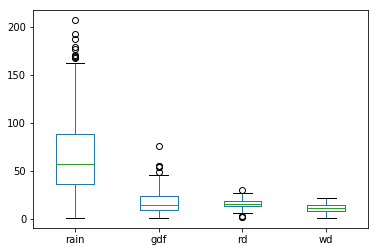

In [101]:
	df1.plot.box()

We can see evidence of the positive skew in 'rain' and 'gdf' by reference the 2nd Quartile line (green) - in each case, it's well below the mid point of the 1st to 3rd Quartile bounds, wheras with 'rd' and 'wd' it's more centred in the box.

# 2. Calculate the relationships between variables in the dataset

The Distribution plots suggest a positive correlation between two pairs of variables - namely rain & gdf, and rd & wd. Lets draw scatterplots to get a feel of the relationship (if any) between the variables as suggested by the data. 

### Scatterplots

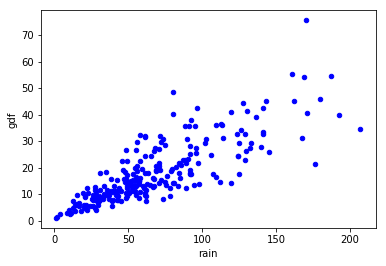

In [33]:
# based on their similar distributions, lets look at the relationship between 'rain' and 'gdf'
df.plot(kind='scatter',x='rain',y='gdf',color='blue')

The scatter plot suggests a positive correlation between monthly rainfall values (mm) and greatest daily fall values (mm) in each month. This may seem unsurprising, but there are countries (Spain perhaps?) where it can rain very heavily for one or two days, and hardly at all for the rest of the month - so this correlation is not an obvious one, except in countries like Ireland where it rains pretty consistently in certain months of the year, during which the heaviest one-day falls also occur. 

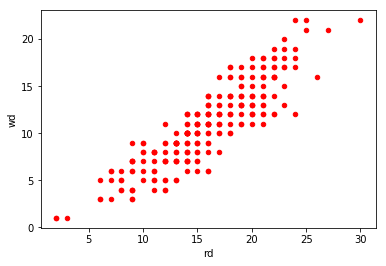

In [34]:
df.plot(kind='scatter',x='rd',y='wd',color='red')

This scatter plot suggests a linear relationship between two variables, with a high correlation between the number of days each month in which rainfall exceeded 0.2mm (rd), and the number of days each month in which rainfall exceeded 1.0mm (wd). This is hardly a surprising discovery, since any day when >1mm of rain fell is also a day when >0.2mm of rain fell (verified by checking sum of rd + wd : in many months it exceeded 31, with some values as high as 52).

### Linear Regression models using Seaborn

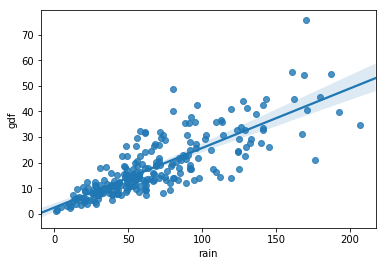

In [35]:
sns.regplot(x="rain", y="gdf", data=df);

sns.regplot plots the regression line and a 95% confidence interval for that regression. As the shaded bands widen, the range of possible lines of regression at 95% confidence intervals 
also widen.


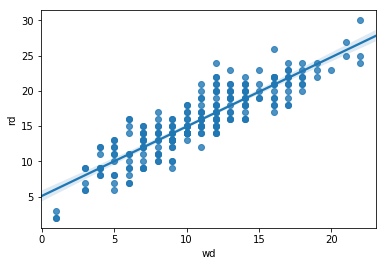

In [36]:
sns.regplot(x="wd", y="rd", data=df);

So this regression line, also drawn with sns.regplot, shows a tighter relationship between the two variables over the whole range of data values than the previous plot.

### Calculate the Coefficient of correlation for both pairs of variables

Now lets look at the coefficient of correlation between each pair of variables (rain & greatest daily fall). In order to calculate the correlations for each dataset I must restate each of values as a distinct array which can be called by the np.corrcoef(x, y) command:

In [37]:
#numpy array datasets
np.array(df['rain'].tolist())

array([ 91.8,  11.5,  70.7, 187.4,  84.4, 109.4,   8.4,  61.3, 136.5,
        27.7, 125.1,  34.2,  33.8,  89.4,  73.5,  87.1,  74.8,  61.8,
        22.4,  19.9,  67.7,  48.1,  58.2,  19.7, 119.6, 139.8,  42.9,
        41.9,  61. ,  26.1,  39.6,  12.8,  94.3,  33.9,  29. ,  35.1,
        46. , 124.9,  62.1, 160.9, 141.4,  55.1,  49. ,  96. ,  52.7,
        65.5,  28.7,  42.6,  76.9,  27.6,  96.7,  29.8,  22. ,  61.5,
        89.5,  37.3,  61.1, 127.8,  49.4,  72.4,  54.8,  15.6, 167.5,
       192.8, 129.1,  42.9,  43.5,  28.1,  48.3,  88.1,  91.6,  36.6,
        20.5,  36.8, 102.5,  68.6,  49.4,  78.8,  14.3,  67.9,  45.2,
        36.3,  61.3,  54.9, 109.4,  35.1, 124.3,  47.6,  40.4,  59.7,
        30.5,  67.5,  58.1,  61.7,  16.6,  92.2,  26.3,  50.6, 133.2,
        56. ,  71. ,  28. ,  33.6,  89.4,  30.2, 101.9,  22.6,  14.9,
        72.9,  83.9,  85.4,  91.8, 105.7,  62.8,  64.7,  54.7,   4.2,
        26. , 124.5, 107.1, 112.6,  24.4,  15.2,  45.3,  41.8,  98.1,
        21.4, 123.5,

In [38]:
np.array(df['gdf'].tolist())

array([17.4,  2.9, 20.7, 54.6, 21.7, 16.5,  2.9, 10.3, 39. , 12.5, 29.1,
        nan, 13.2, 21.6,  8. , 23. , 28.7,  9.3,  3.9,  4.8, 15.6, 14.5,
       22.5,  nan, 41. , 27.8,  9.3, 11.1, 12.3,  9.5,  7.6,  7.5, 13.3,
        9.4,  7.4,  nan,  nan, 17.5,  7.4, 55.4, 33.5, 16.3, 12.2, 25.6,
       12.3, 24.5,  8.5, 15.3,  nan,  4.6, 42.5,  7.9, 12.3,  9.5,  nan,
        9.5, 17.9, 44.2, 17.3, 15.3, 12.9,  9.7, 31.2, 39.8, 22.8,  7.7,
       12. ,  8.3, 15.6, 22.8, 25. ,  9.8,  9.1,  8.2, 30.8, 18.7, 13. ,
       18.7,  3.7, 27.2,  7.4, 10.3, 24.3,  nan, 35.9, 18.5, 24.5, 18.3,
       13. , 13.2,  7.4, 26.4, 10.9, 11.4,  5.5, 37.8,  nan, 14.7, 29.1,
       18.7, 21.7,  9.1, 10. , 12.2,  9.3, 29.1, 10.3,  6. ,  nan, 13.1,
       21. , 28.1, 24.8, 13.7, 13.5, 20. ,  2.6,  7.7, 24.2, 17.4, 36.6,
        5.5,  6.3, 11.2,  9.5, 13.9,  6. , 32.7,  8. ,  5. , 19. , 34. ,
       45. , 35.5, 20.3, 10.4, 11.7, 23.1, 31.7,  9. , 13.3, 14.6, 22.5,
       31. , 11. , 17.9, 27.4, 21.2, 18. , 35.8, 10

In [39]:
rain = np.array([ 91.8,  11.5,  70.7, 187.4,  84.4, 109.4,   8.4,  61.3, 136.5,
        27.7, 125.1,  33.8,  89.4,  73.5,  87.1,  74.8,  61.8,  22.4,
        19.9,  67.7,  48.1,  58.2, 119.6, 139.8,  42.9,  41.9,  61. ,
        26.1,  39.6,  12.8,  94.3,  33.9,  29. , 124.9,  62.1, 160.9,
       141.4,  55.1,  49. ,  96. ,  52.7,  65.5,  28.7,  42.6,  27.6,
        96.7,  29.8,  22. ,  61.5,  37.3,  61.1, 127.8,  49.4,  72.4,
        54.8,  15.6, 167.5, 192.8, 129.1,  42.9,  43.5,  28.1,  48.3,
        88.1,  91.6,  36.6,  20.5,  36.8, 102.5,  68.6,  49.4,  78.8,
        14.3,  67.9,  45.2,  36.3,  61.3, 109.4,  35.1, 124.3,  47.6,
        40.4,  59.7,  30.5,  67.5,  58.1,  61.7,  16.6,  92.2,  50.6,
       133.2,  56. ,  71. ,  28. ,  33.6,  89.4,  30.2, 101.9,  22.6,
        14.9,  83.9,  85.4,  91.8, 105.7,  62.8,  64.7,  54.7,   4.2,
        26. , 124.5, 107.1, 112.6,  24.4,  15.2,  45.3,  41.8,  98.1,
        21.4, 123.5,  33.2,  20.9,  71.6, 126. , 162.1,  88.3,  82.4,
        48.3,  35.6,  90.6,  61.3,  20.7,  75.6,  75.1,  49.3, 113.8,
        52.9,  30.9,  95.7, 176.6,  63.5,  95.2,  42.4,  57.6,  28.1,
        73.4,  48.5,  90.8,  42.1, 128.9,  45.7, 145. ,  67.2,  28.5,
        76.4,  14.1,  10.8,  50.2,  71.1,  50.4,  59.6,  56. , 170. ,
        81.1,  39.1,  71.5,  18.3,  16.5,  67. ,  69.1, 179.5, 112.2,
        85.2,  80.5,  79.8,  80.6,  55. , 130.3,  52.1, 141. ,  47.3,
        54.6,  30.3,  39.8,  25.6,  51.4, 129.7,  30.7,  92.5, 119.2,
       132.2,  49.2,  40.6,  80.2,  50.2,  57.3, 169. ,   2.1, 142.9,
       170.8,  46.8,  48.2,  25.9,  50.5,  31.6,  89.8,  12.7,  97.4,
        70.6,  58.2,  53.1,  78. , 207. , 140.9,  53.3,  29.7,  55.6,
        38.7,  57.5,  28. ,  55.5,  68.6,  38.6,  31. ,  55. ,  19.3,
        66.5,  57.3,   9.9,  61.5,  84.3,  38.4,  53.1,  91.5,  55.1,
        72.3,  57.9,  91.8,  29.6, 113.1,  78.4,  20.1,   1.2,  43.5,
        27.8])

gdf = np.array([17,  2, 20, 54, 21, 16,  2, 10, 39, 12, 29, 13, 21,  8, 23, 28,  9,
        3,  4, 15, 14, 22, 41, 27,  9, 11, 12,  9,  7,  7, 13,  9,  7, 17,
        7, 55, 33, 16, 12, 25, 12, 24,  8, 15,  4, 42,  7, 12,  9,  9, 17,
       44, 17, 15, 12,  9, 31, 39, 22,  7, 12,  8, 15, 22, 25,  9,  9,  8,
       30, 18, 13, 18,  3, 27,  7, 10, 24, 35, 18, 24, 18, 13, 13,  7, 26,
       10, 11,  5, 37, 14, 29, 18, 21,  9, 10, 12,  9, 29, 10,  6, 13, 21,
       28, 24, 13, 13, 20,  2,  7, 24, 17, 36,  5,  6, 11,  9, 13,  6, 32,
        8,  5, 19, 34, 45, 35, 20, 10, 11, 23, 31,  9, 13, 14, 22, 31, 11,
       17, 27, 21, 18, 35, 10, 13,  7, 30, 26, 35,  7, 32, 22, 26, 13, 10,
       16,  5,  2, 10, 14, 14, 19, 20, 75, 14,  5, 32,  3,  6, 16, 19, 45,
       14, 16, 48, 19, 40,  9, 41, 15, 42, 15, 11,  7, 10,  8, 14, 26, 11,
       17, 14, 27,  9, 11, 14, 13, 15, 54,  1, 45, 40, 18,  8,  5, 10,  8,
       30,  4, 21, 26, 32, 15,  9, 34, 32, 13,  5, 29,  7,  8,  4, 26, 20,
       15,  8, 13, 10, 12, 14,  4, 32, 18, 11, 17, 19, 14, 29, 16, 18,  7,
       36, 12,  6,  1, 12, 11])

In [40]:
# find the correlation between 'rain' and 'gdf':
corr1 = np.corrcoef(rain,gdf)
corr1

array([[1.        , 0.80993617],
       [0.80993617, 1.        ]])

In [41]:
#numpy array datasets
np.array(df['wd'].tolist())

array([16.,  4., 10., 17., 12., 15.,  4., 11., 16.,  5., nan, nan,  7.,
       17., 15., 14., 17., 12.,  6.,  5., 14., 10., 11., nan,  9., 13.,
        7.,  6., 12.,  6., 13.,  3., 16., 11.,  9.,  7., nan, 16., 17.,
       11., 17.,  8., 10., 12., 11.,  9.,  6., nan, nan,  7., 12., 10.,
        4., 13., 16.,  5., 12., 15., 11., 12., 12.,  3., 15., 21., 18.,
        7.,  8.,  8.,  9., 21., 10., 10.,  5.,  7.,  9.,  9., 12., 16.,
        6., 14., 14.,  6., 11., 10., 13.,  8., 16.,  6., 10., 13.,  9.,
        8., 14., 13.,  5.,  9.,  8., 10., 14., 11.,  9.,  8.,  7., 18.,
        9., 13.,  4.,  3., 12., 14., 10., 12., 16., 12., 13., 10.,  1.,
        8., 17., 19., 12.,  7.,  4.,  8., 11., 17.,  6., 12., 11.,  7.,
       13., 14., 18., 13., 13.,  8.,  7., 16.,  5.,  5., 14., 13.,  8.,
       20., 18.,  5., 17., 22., 14., 12., 11.,  8.,  9., 11.,  6., 12.,
       10., 15.,  9., 19., 11.,  8., 16.,  4.,  4., 11., 12., 10., 12.,
       12.,  9., 12., 14.,  8.,  7.,  5., 14., 13., 19., 18., 17

In [42]:
#numpy array datasets
np.array(df['rd'].tolist())

array([18., 12., 14., 22., 14., 19.,  8., 15., 26., 11., nan, nan,  9.,
       18., 23., 19., 23., 22., 15., 13., 19., 14., 15., nan, 15., 20.,
       13., 16., 20., 14., 20.,  9., 20., 16., 16.,  9., nan, 22., 22.,
       21., 24., 13., 16., 21., 19., 14., 11., nan, nan, 14., 20., 14.,
       12., 16., 22., 12., 17., 20., 16., 15., 15.,  6., 21., 25., 21.,
       15., 11., 11., 12., 27., 14., 17.,  6., 14., 12., 13., 18., 21.,
        7., 17., 18., 10., 14., 18., 17., 13., 21., 11., 18., 21., 13.,
       15., 21., 19.,  8., 15., 11., 14., 20., 16., 13., 11., 13., 24.,
       14., 20.,  9.,  9., 20., 18., 15., 17., 19., 21., 17., 16.,  3.,
       14., 21., 23., 16., 13.,  9., 12., 17., 19.,  8., 24., 19., 10.,
       19., 16., 21., 16., 18., 17.,  9., 18., 11., 12., 18., 21., 10.,
       23., 23.,  8., 18., 24., 21., 16., 18., 10.,  9., 16.,  7., 17.,
       17., 19., 13., 24., 16., 14., 19.,  9., 11., 20., 14., 14., 18.,
       14., 13., 15., 18., 16., 15.,  7., 21., 16., 22., 20., 23

In [43]:
wd = np.array([16.,  4., 10., 17., 12., 15.,  4., 11., 16.,  5.,  7., 17.,
       15., 14., 17., 12.,  6.,  5., 14., 10., 11.,  9., 13.,  7.,  6.,
       12.,  6., 13.,  3., 16., 11.,  9., 16., 17., 11., 17.,  8., 10.,
       12., 11.,  9.,  6.,  7., 12., 10.,  4., 13.,  5., 12., 15.,
       11., 12., 12.,  3., 15., 21., 18.,  7.,  8.,  8.,  9., 21., 10.,
       10.,  5.,  7.,  9.,  9., 12., 16.,  6., 14., 14.,  6., 11., 13.,
        8., 16.,  6., 10., 13.,  9.,  8., 14., 13.,  5.,  9., 10., 14.,
       11.,  9.,  8.,  7., 18.,  9., 13.,  4.,  3., 14., 10., 12., 16.,
       12., 13., 10.,  1.,  8., 17., 19., 12.,  7.,  4.,  8., 11., 17.,
        6., 12., 11.,  7., 13., 14., 18., 13., 13.,  8.,  7., 16.,  5.,
        5., 14., 13.,  8., 20., 18.,  5., 17., 22., 14., 12., 11.,  8.,
        9., 11.,  6., 12., 10., 15.,  9., 19., 11.,  8., 16.,  4.,  4.,
       11., 12., 10., 12., 12.,  9., 12., 14.,  8.,  7.,  5., 14., 13.,
       19., 18., 17.,  6., 13.,  7., 13., 17., 10., 12., 10., 11.,  7.,
        6.,  7., 10., 14.,  7., 12., 22., 16., 12.,  9., 16.,  9., 10.,
       12.,  1., 11., 16.,  7., 14.,  7.,  9.,  9., 12.,  3., 14., 11.,
        6., 11., 18., 22., 14., 11.,  8.,  9.,  9., 14., 11.,  8., 14.,
        4.,  7., 11.,  5., 12., 12.,  3.,  9., 12.,  7.,  9., 13., 10.,
       10., 10., 17., 11., 18., 16.,  5.,  1.,  7., 10.])

rd = np.array([18., 12., 14., 22., 14., 19.,  8., 15., 26., 11., 9., 18.,
       23., 19., 23., 22., 15., 13., 19., 14., 15., 15., 20., 13., 16.,
       20., 14., 20.,  9., 20., 16., 16., 22., 22., 21., 24., 13., 16.,
       21., 19., 14., 11., 14., 20., 14., 12., 16., 12., 17., 20.,
       16., 15., 15.,  6., 21., 25., 21., 15., 11., 11., 12., 27., 14.,
       17.,  6., 14., 12., 13., 18., 21.,  7., 17., 18., 10., 14., 17.,
       13., 21., 11., 18., 21., 13., 15., 21., 19.,  8., 15., 14., 20.,
       16., 13., 11., 13., 24., 14., 20.,  9.,  9., 18., 15., 17., 19.,
       21., 17., 16.,  3., 14., 21., 23., 16., 13.,  9., 12., 17., 19.,
        8., 24., 19., 10., 19., 16., 21., 16., 18., 17.,  9., 18., 11.,
       12., 18., 21., 10., 23., 23.,  8., 18., 24., 21., 16., 18., 10.,
        9., 16.,  7., 17., 17., 19., 13., 24., 16., 14., 19.,  9., 11.,
       20., 14., 14., 18., 14., 13., 15., 18., 16., 15.,  7., 21., 16.,
       22., 20., 23., 16., 19., 14., 19., 20., 14., 17., 15., 15., 12.,
        9., 11., 13., 22., 12., 16., 25., 22., 15., 13., 22., 10., 14.,
       22.,  2., 16., 17., 12., 20., 14., 14., 10., 19.,  6., 20., 14.,
        9., 12., 22., 30., 19., 17., 14., 13., 13., 16., 17., 15., 16.,
        8., 13., 15., 13., 16., 16.,  7., 16., 18., 12., 15., 23., 15.,
       15., 15., 21., 15., 22., 21., 10.,  2.,  9., 14.])

In [44]:
# find the correlation between 'wd' and 'rd':
corr2 = np.corrcoef(wd,rd)
corr2

array([[1.        , 0.88964638],
       [0.88964638, 1.        ]])

As expected from the above plots, the coefficient of correlation between 'rain' and 'gdf' (at 0.8099) is strongly positive, but not as positive as that for 'wd' and 'rd' (at 0.8896) - rounded off, approximately 80% versus 90% correlation.

# 3. Synthesise data based on the real data

In our investigation above we discovered that while variables 'rd' and 'wd' loosely fit a normal distribution, the 'rain' and 'gdf' variables show a positively skewed distribution. Synthesising data to imitate these distributions may be a challenge. Lets try a poisson distribution for 'rain' first. 

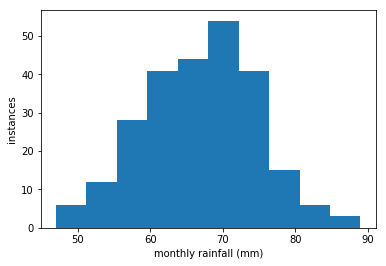

In [45]:
# Monthly Rainfall (rain) looks like a Poisson distribution?
# generate a random sample of 250 values using a poision distribution with lamda of 66
prain = np.random.poisson(lam=(66), size=(250))
plt.xlabel ('monthly rainfall (mm)')
plt.ylabel ('instances')
plt.hist(prain)
plt.show()

In [46]:
# convert the data array to a dataframe:
prain = pd.DataFrame(np.array(prain))
prain.describe()

,0
count,250.000000
mean,66.928000
std,7.880305
min,47.000000
25%,61.250000
50%,67.000000
75%,73.000000
max,89.000000


In [47]:
# to test distribution for 'skewness', find the median 
prain = np.median(prain)
print (prain)
# so the median is :

67.0


CONCLUSION: 
While this Poisson Distribution can be manipulated by the inputs to produce a mean value almost identical to the original real data mean, no amount of manipulation has delivered authentic figures for the remainder of the descriptive statistics. In addition, the median & mean similar, so there's no skew in the distribution (the real data shows significant positive skew). This is not a good fit as a simulation.

Lets try simulating rain data using the normal distribution.

In [48]:
np.random.seed(55219)

In [49]:
nrain = np.random.normal(66.385375, 40.455267,250).round() # (mu, sigma, size), Float 1
# using the mean & standard deviation of the actual data in the original 'real world' sample.

In [50]:
# convert the data array to a dataframe:
nrain = pd.DataFrame(np.array(nrain))
nrain.describe()

,0
count,250.000000
mean,60.632000
std,41.432005
min,-62.000000
25%,29.000000
50%,61.500000
75%,88.000000
max,186.000000


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


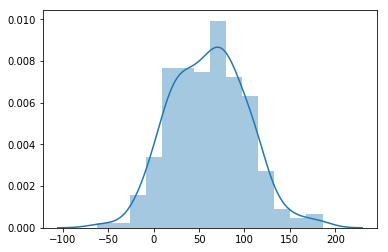

In [51]:
#plot the Normal probability distribution for the synthetic 'nrain' values
sns.distplot(nrain);

CONCLUSION:  While this result mimics most of the key stats from the original data, this simulation produces some negative values. One cannot have negative amounts of rain! Lets try the Binomial Distribution, as it guarantees positive integers:

In [52]:
np.random.seed(55219)

In [53]:
brain = np.random.binomial(133,0.5,50).round(1) # (mu, sigma, size), Float 1
# using the mean & standard deviation of the actual data in the original 'real world' sample.

In [54]:
# convert the data array to a dataframe:
brain = pd.DataFrame(np.array(brain))
brain.describe()

,0
count,50.000000
mean,65.980000
std,6.300275
min,50.000000
25%,62.000000
50%,66.000000
75%,71.000000
max,79.000000


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


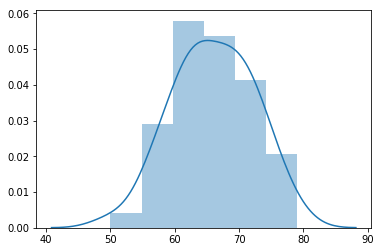

In [102]:
#plot the Normal probability distribution for the synthetic 'brain' values
sns.distplot(brain);

CONCLUSION: While it gives all positive values and its possible to find a set of inputs which simulate one of the key stats of the real data, such as mean (66.4), the remainder cannot be matched. Lets park this challenge for 'rain' and 'gdf' for the moment and simulate basic data for all four variables using the Normal Distribution.

## Create synthetic data for all four variables & compare to real data


### A reminder of how the real data looks:

In [113]:
df1.describe()

,rain,gdf,rd,wd
count,253.000000,244.000000,247.000000,247.000000
mean,66.385375,18.068443,15.777328,10.846154
std,40.455267,11.742786,4.752728,4.291300
min,1.200000,1.000000,2.000000,1.000000
25%,36.600000,9.500000,13.000000,8.000000
50%,57.500000,14.650000,16.000000,11.000000
75%,88.300000,24.350000,19.000000,14.000000
max,207.000000,75.600000,30.000000,22.000000


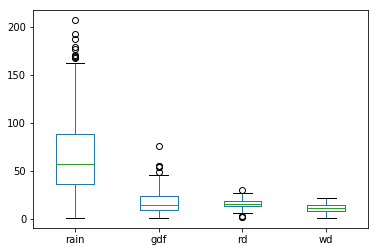

In [114]:
df1.plot.box()

### Create a new dataframe with a synthetic dataset
preface each variable name with 's' for 'synthetic'

In [104]:
np.random.seed(55219)

In [115]:
# (mu, sigma, size), Ints.
# using the mean & standard deviation of the actual data in the original 'real world' sample.
dfsyn = pd.DataFrame({'srain':np.random.normal(66.385, 40.455, 250).round(1),'sgdf':np.random.normal(18.068, 11.743, 250).round(1),'srd':np.random.normal(15.777, 4.753, 250).round(),'swd':np.random.normal(10.846, 4.291, 250).round()})

In [116]:
dfsyn.describe()

,srain,sgdf,srd,swd
count,250.000000,250.000000,250.000000,250.000000
mean,68.530000,17.547200,15.204000,10.492000
std,41.823101,11.592142,4.398154,3.964949
min,-49.100000,-15.600000,3.000000,1.000000
25%,39.750000,10.150000,12.000000,8.000000
50%,72.750000,17.500000,15.000000,11.000000
75%,97.675000,24.400000,18.750000,13.000000
max,178.600000,51.600000,26.000000,24.000000


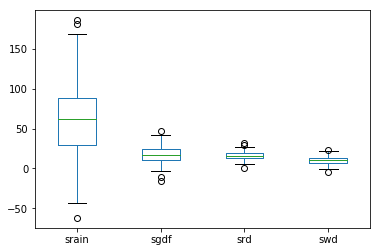

In [107]:
dfsyn.plot.box()

CONCLUSION: The means & std deviations of all four variables approximate to the real data. The max values are in the ballpark, but the minima again show negative values. The Distribution Quartiles show an excellent match for rain days (rd) and wet days (WD), a near match on greatest daily fall (gdf), and are in the ballpark for 'rain' data - except for the lack of positive skew and the negative values for minimum - also an issue for gdf and wd. 

following this methodology (https://www.researchgate.net/post/Is_there_a_way_of_generating_random_fake_numerical_data_that_would_fit_statistical_descriptions)

To manipulate the values closer to the original dataset, I must (1) subtract the mean from all the values, (2) create a new dataframe, (3) calculate the sd of the resulting df, (4) divide the sd of the original dataset by the sd of the calculated dataset to a get a co-efficient. (5) Then multiply all the simulated values by that coefficient, (6) add the desired mean (ie. of the original dataset) back to all the values to get the final simulated dataset which should immitate the original quite well.

step (1): add another column of values made by subtracting the mean from the df values:

In [ ]:
df.columns = ['value', 'less mean', 'coef', 'add mean']
df['less mean'] = '0'
df['coef'] = '0'
df['add mean'] = '0'
df